In [1]:
%%html
<img src="images/rice_field_header.png",width=600,height=600>

# Using Single Shot MultiBox Detector to Predict the Location of Rice Field in Banyuwangi Region

# Executive Summary

## Background

Rice field is one of the unique component of Indonesian people. Indonesia is widely known as agragrian country, where since long time ago, this sector becomes one of the most important economic foundation of its people. However, in the midst of globalization and the development that is done massively and largely by current administration, many people especially for those who lives in village and far from town, start losing their own rice field, which previously located in front of their houses. This would happen due to the impact of massive development, allowing tall buildings such as apartment, mall, and other elite housing to be built. For the villagers and those who lives far from town, rice field is one of their most precious assets. Apart for their main income, they also can consume their own yields without the needs to go to the central market. 

Based on the research from various sources, rice field remains one of the most important element for the development of the country. If we look at the Indonesia's development agenda, the government still put rice field as one of the important focus amid massive development of buildings and roads. 

Modern city is defined as the city that still preserves the green area as the main features of the city. The purpose is not only to beautify the appearance of the city, but also to decrease air pollution, that is highly produced due to the urban citizen that commute to their office by using their own private car or motorcycle. Rice field must be preserved as an effort to maintain green area and cleanse the city's atmosphere that is now become darker day by day.

## Purpose

Based on the fact regarding the importance of rice field for the Indonesian people, especially for those who are living in downtown, it really becomes important to rapidly understand the proportion of the rice field in one one area without have to count them manually and deploy the surveyor to the field. This purpose can be achieved through utilizing satellite imagery that is now widely opened to the public. When we have access to the wide range of satellite imagery depicting one area, it would be much easier for us to digitize how many rice field that cover each area. 

The traditional way of knowing this information is by manually counting it, in which one of them is by using ArcGIS Pro software to label the object one by one. But this method takes a lot of time and become highly inefficient especially when we deal with large dataset. To tackle this problem, in this project, I will utilize object detection deep learning algorithm to help me determine the location of each rice field without manually find and count them. This method will save some time particularly when we have to deal with locations that have huge and wide areas. By automatically detect the object using deep neural network, by only inputing the area that we wish to analyze, we can immediately see the proportion of rice field, houses, trees, and road which constitute that particular area. We also could know the measurement and location of each object directly, without ever need to manually count them. 

In this project, I capture single data from spesific location in Banyuwangi, which I got from [openaerialmap.com](https://openaerialmap.org/), that is open for public. This images has 3 numbers of band with 8 bit pixel depth. This data is chosen because this particular location has balance proportion between each object that is going to be detected and classified, which are rice field, houses, trees, and roads, make this training data highly representative and can be used when the model is deployed to detect objects on another location and areas. 

The work of analysis and modeling in this project was done by utilizing ArcGIS Pro and Python 3 software. The former is used in labeling and getting training data sample while the later is used to build deep neural network model and create simple analysis. Jupyter Notebook IDE is used in this project in order to make the model result readable in report form. 

The raster map that is used in this analysis is as shown below.

In [2]:
%%html
<img src="images/banyuwangi_map.png",width=600,height=600>

## How It's Done

One of the area in Artificial Intelligence where deep learning perform very well in providing insight to the decision maker is computer vision, which defines as the ability of computer or machine to see. This is useful especially for GIS (Geographic Information System), where satelite imagery and drone is now been published in a high volume, make it impossible to analyze data with traditional and old ways. 

Object detection and pixel classification is regarded as the most important computer vision ability and useful also for spatial analysis. Deep learning object detection algorithm requires us to give initial information in the form of bunch of pictures that is already labeled and fed to model. Next, model will learn and train the labeled images and build the model with that images, resulting in particular accuracy. The model will then be used to make prediction on other satelite imagery so it could detect which location consist of rice field, houses, roads, or trees. 

ArcGIS pro software has "Label Objects For Deep Learning" tools that will ease the process of capturing the sample of object that we want to predict in the next step. In this project, I use the number of samples for each class of rice field, trees, roads, and houses. The sample is collected randomly from each edge of satelite imagery that is used in this project, so it can represent the shape of real object that we want to detect and predict. 

The sample that is collected is not that much due to ArcGIS Pro's ability to double the object that has been collected so the model can learn with sufficient amount of images. The bunch of data that has been collected then exported to the spesific folder inside project file which will then be analyzed in Jupyter Notebook. Parameter used in determining whether the model is reliable to be produced and deployed is its precision and if there is a sharp difference between ground truth and prediction. 

## Question of this case study that we want to delve deeper

There are several questions in this research that we will delve deeper, including:

1) How is the proportion of rice field, houses, roads, and trees that resides in the area that is being analyzed

2) How the model perform and how much the accuracy?

3) How the model help decision maker to build appropriate policy?

4) What is the implication of having rice field with large area?

5) What is the parameter needed to achieve high accuracy of model?

## Benefit to the reader / policy maker

This analysis will provide insight on the proportion of particular class object in spesific location, which in this project focus more on rice field. After the proportion is known, then it could be compared with the proportion of previous year, whether it has considerable differences or not. With regards to rice field, there has to be some fixing policy if rice field area start to shrink, impacted by development. It is like the kind of policy that need to be made if development decrease people's ability to be independent financially using their own rice field. 

This analysis can also be used to understand the housing condition in particular area, whether it is already in good proportion or highly densed. By using the model that is built in this project, it could ease the process of analyzing satelite imagery to extraxt information that is useful for decision maker or business owner.This project also shows the power of object detection deep learning algorithm in handling all kind of data, especially regarding geospatial satelite imagery.

# Workflow

## Method Used

This project utilize ArcGIS API for Python, spesifically `arcgis.learn` module, which helps in creating workflow of deep learning and machine learning model in geospatial data. In this project, training data could be fed directly to deep neural network model, so we decide to utilize this powerful model. This module adopt state of the art and most up to date research in deep learning subject, such as fine tuning on pre-trained model using satellite image, and it also adopts fast.ai framework to find appropriate learning rate, so that model training could be done faster, without guessing hyperparameter that need to be set. Next reason to use this module is because it integrates very well with ArcGIS platform, the simplicity of exporting training data. The model that is built could also be directly used in detecting object in other images inside ArcGIS pro.

There are six steps that has to be passed in the completion of this project using `arcgis.learn`, such as:

1) Collecting training data

2) Preparing the data

3) Exporting training data

4) Training the model

5) Publishing and deploying the model

6) Writing model inference

## Collecting training data

The first thing that need to be done before building the model is collecting training data from satelite imagery that is going to be analyzed. The location that is used in this analysis is in Banyuwangi area, the city in East Java province, Indonesia. The image that is used is raster imagery that is collected from openaerialmap that opens its data publicly. To collect and label the object inside those images that will then be usde as training data, we use label objects for deep learning tool in ArcGIS pro. When we assign object with polygon, we automatically get the feature class of image so that we can easily export them in the form image chips, so it can be used to build the model. Here are the steps that need to be completed:

1) Label object with "label objects for deep learning" tool 

2) Save data as image chips to a folder

We then partition / separate the objects in this location / area into four classes, which is rice field, roads, houses, and trees. In each of the class, there are balance amount of objects to reduce bias and increase the accuracy of model. This image then be exported to be able to be used in modeling part. The step in ArcGIS Pro is shown below.

In [4]:
%%html
<img src="images/collect_trainingdata.png",width=600,height=600>

## Preparing the data

Data preparation is also part of data collection. Due to the decision to use Single Shot Detector Object Detection algoritm, the object that are collected must be surrounded inside bounding box so algoritm can read those images. Apart from that, the bounding box must also include raster layer that contains every information regarding pixel and band.

## Exporting training data

After collecting and labeling objects for each class in this location, we can immediately export the data in the form of image chips, that its folder is already available from previous step. We use "export training data" inside image classification tool to help us in completing this step. The output images will have JPEG format, so that we can access it using jupyter notebook next in modeling step. The data that is succesfully collected (amount). We use the tile size of 448 and set meta data format as PASCAL Visual Object Classes that is compatible with SSD object detection algorithm. Below is the process of completing this step using ArcGIS pro.

In [3]:
%%html
<img src="images/export_trainingdata.png",width=600,height=600>

In the next step we will use this data for modeling purpose.

## Training the model

In this step, we will utilize this library as shown below.

In [1]:
import arcgis
from arcgis.learn import prepare_data, SingleShotDetector

In [44]:
import arcpy

### Data Preparation

Firstly, we prepare the data so that it is compatible with the format that is required by model using `prepare_data()` method. There are several input that is included in this method, such as path, batch_size, and chip_size. Path is the folder location contains image chips training data with JPEG format that will be accessed for modeling purpose. Batch size parameter is the amount of sample that will be used to train neural network in each iteration. If we have 1000 training samples in the form of image chips and batch size of 100, first 100 samples will be fed to neural network. For the next iteration, 100 samples will be used, and so on and so forth. Due to the limitation of GPU CUDA in the machine that is used in this project, batch size of the project will be set at 8 so that model could be run seamlessly. Fir chip size, we could used similar number as we export the image chips. Chip size is the size of the image that will be used in model training. For this project, we set image size as 448. Below is the process and workflow of this step. 

In [2]:
# Prepare Data
data = prepare_data(path=r'imageChips6',
                    chip_size=448, 
                    batch_size=8)

### Visualize samples of training data

To get the complete picture about training data that will be fed and used in object detection model, we will use `show_batch()` method that will randomly show and visualize training data with bounding box that we have collected in data collection step. If we want to visualize with spesific format, we can set the row inputs with the format we want.

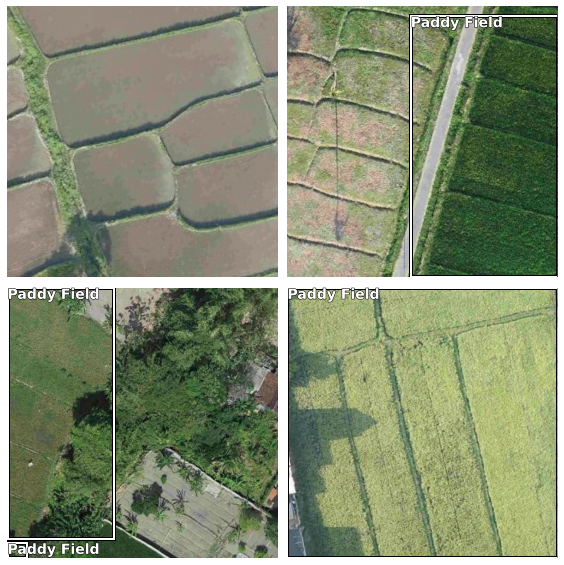

In [3]:
data.show_batch(rows=2, alpha=0.7)

Above image show the sample image with the bounding box that similar with what we have collected. However there are several additional images with the position that differs from original images. This doubling of image with differenct position is automatically done by ArcGIS Pro in order to build more accurate model.

### Build Single Shot Detector Model

For the reason that the main purpose of this project is to do object detection on four classes, which are rice field, houses, trees, and roads, we will use Single Shot Multi Detector (SSD) algorithm, which is widely used in object detection work. The main difference between object detection and image classification is while image classification only predict the object on a particular image, object detection goes far beyond it and also have capability to detect the location of the object. The output that will be produced by this model such as:

1) Probability of the existence of object in the image

2) Height of bounding box

3) Wide of bounding box

4) Horizontal coordinate of central point of bounding box

5) Vertical coordinate of central point of bounding box

In a simple definition, SSD have two components, which are backbone model and SSD head. Backbone model is image classification network which has been previously trained, and be used to extract feature. The transfer learning principle is used in the backbone model. It can be manifested in the form of model like ResNet which has been trained using Image Net dataset, where classification layer that is connected is already removed. After it is removed, we have deep neural network that can extract feature from new image input that we fed to the model. SSD head is one or more of the convolutional layer that is added to resnet backbone, with the output of bounding box and class object in spesific location in satelite imagery that we analyze.

Below is the architecture of SSD algorithm.

In [7]:
%%html
<img src="images/ssd_archi.png",width=600,height=600>

To impelement and define SSD model algorithm, we only need to write one line of code using `arcgis.learn` module, with `SingleShotDetector()` as a method. This method need an input of data that has been transformed and prepared in previous step. We can also add another input, such as defining grid, zooms, and ratio. This three input basically are the format of anchor box, which is the output of this model. 

In [4]:
model = SingleShotDetector(data)

### Determining learning rate

One of the most important step in deep learning model optimization is hyperparameter tuning. In this step we will complete one of them which is determining and finding learning rate that is more optimum when used in model training. Learning rate is one of the most important parameter in hyperparameter, that is used to control how many change should be made by model to tackle the error everytime model weights are updated. Learning rate that is too high will result in model convergence that is not optimum while too low learning rate will slow down convergence of the model. In this step we will use `lr_find()` method to find optimum learning rate to make sure the model is robust enough to be produced and deployed. 

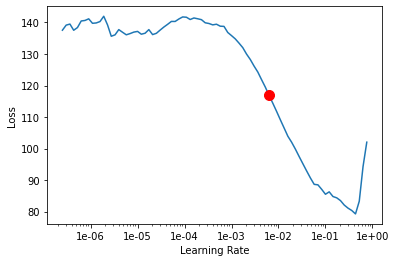

0.006309573444801929

In [5]:
model.lr_find()

Above method provide model with the small batch of data with particular range of learning rate while recording losses at each learning rate after training is completed. The result as shown above is in the form of graph where loss is plot in y axis and learning rate is plot in x axis. According to the learning rate graph above, we could see that loss start to dip down start from learning rate of 0.006. Knowing that, in model fit step, we will set learning rate with these number. 

### Fit model with learning rate and epoch

We would use `fit()` method and fit model using 30 epochs, meaning that we would train data with 30 iteration, so that we could get robust and accurate result. Learning rate, as mentioned above, is set with 0.006.

In [6]:
model.fit(30, lr=0.006)

epoch,train_loss,valid_loss,time
0,10.315011,11.733285,06:37
1,8.113664,9.358253,06:47
2,7.934251,9.320403,06:44
3,7.289202,23.042048,06:44
4,7.615413,14.468821,06:49
5,7.603299,11.346416,06:48
6,7.834518,9.946873,06:50
7,7.511830,7.811392,06:47
8,7.941373,9.044391,06:48
9,7.663841,9.387100,06:37


From the result above, we could see the change of the loss from training and validation set. This helps us to determine how much the model is succesful in generalize data that never be seen before, and also to avoid overfitting of the model. As seen, with only 30 epoch, we could get the result that is reasonable and satisfying. The loss from model fitting is also plotted as a graph with loss as y axis and batches processed as x axis, as shown below.

In [5]:
%%html
<img src="images/loss_graph.png",width=600,height=600>

### Evaluate Model

To measure the performance of object detection model, we use the concept of Intersection over Union (IoU). IoU computes intersection over the union of the two bounding boxes; the bounding box for the ground truth and the predicted bounding box. An IoU of 1 implies that predicted and the ground-truth bounding boxes perfectly overlap.

We use Precision as the metrics to evaluate the performance. Precision and Recall are calculated using true positives(TP) and false positives(FP). We also need to consider the confidence score for each object detected by the model in the image. Consider all of the predicted bounding boxes with a confidence score above a certain threshold. Bounding boxes above the threshold value are considered as positive boxes and all predicted bounding boxes below the threshold value are considered as negative.

Further improvement could be made by setting up new hyperparameter until we get the most perfect result. This model will then be saved in the folder image chips that is already available.

### Saving the model

We will save the model that is already been trained in the form of deep learning package ('.dplk'). Deep learning package is normally used as a general format so we can deploy it inside ArcGIS platform.

We will use `save()` method to save the model. The model will be directly saved in sub folder named "model" inside main folder that contains training data. 

In [7]:
model.save('paddy_detection')

WindowsPath('imageChips6/models/paddy_detection')

### Detect and visualize five classes in validation set

After we get the model, we will show the prediction result hand in hand with the ground truth, so that we could get the picture on how our model perform compared to ground truth, and how accurate our model in predicting the object in this location. Below we will create a plot with 8 row of images with the threshold of 0.3. Threshold in the probability of the existence of an object. Higher threshold means higher confidence level. 

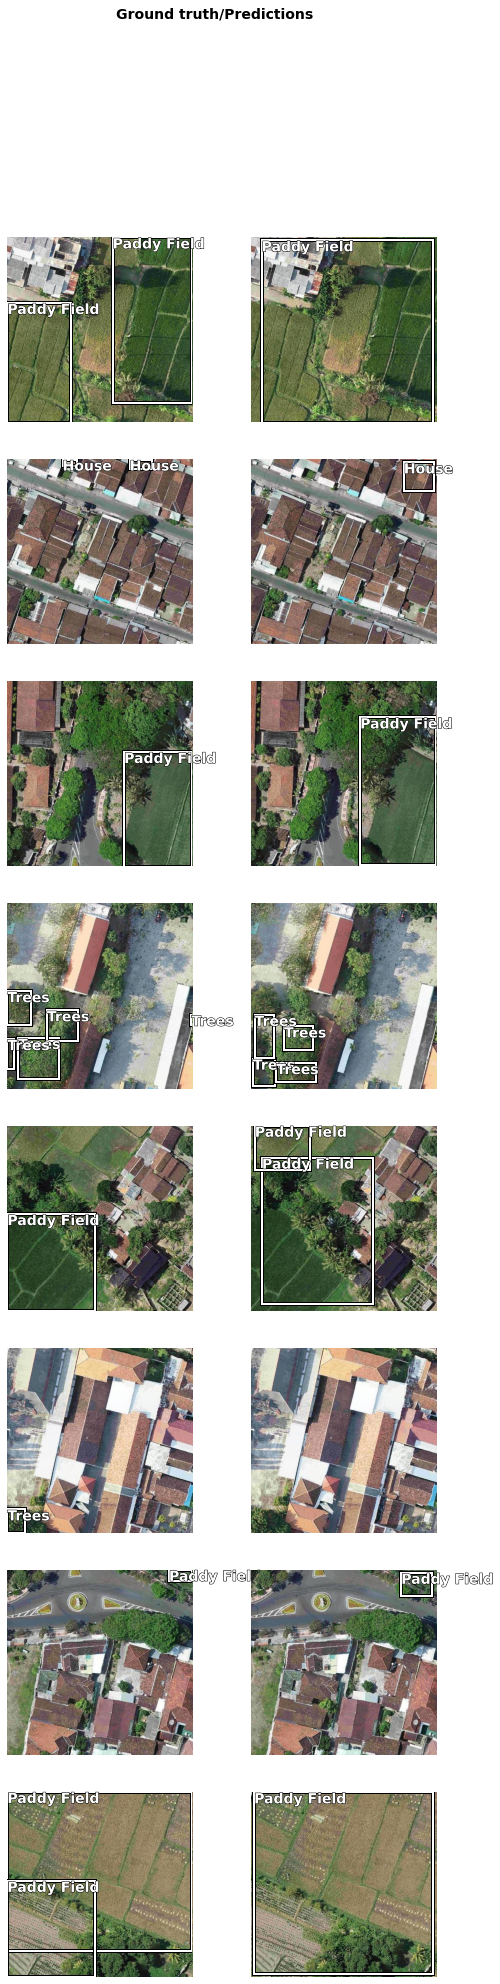

In [8]:
model.show_results(rows=8, thresh=0.2)

As shown in subset of picture above, we could conclude that our model perform well in predicting object compared to ground truth. 

### Model deployment

In this step, we will set the path of model_package with the file named "paddy_detection.dplk" that contains this two information:

1) Model definition file with the ".emd" format that contains information on model framework (tensorflow / PyTorch)

2) Model file in binary format

The model deployment in this project can be done in three methods, using 'Detect Objects Using Deep Learning' tool in ArcGIS pro or by using ArcGIS online platform. I faced several error during completion of this step due to several causes. When I try to detect object tool using ArcGIS platform, the tools are running perfectly until 99% and it stops immediately and showed error that I put below.

In [6]:
%%html
<img src="images/detectobj_tools.png",width=600,height=600>

I then try to use Python syntax to run similar tool in ArcGIS pro but it again shows similar error. I have changed and tweaked several parameter and set batch size to 1 in order to help my GPU run the model seamlessly but nothing happened. The error is still there. The syntax and error I mention is as shown below. 

In [54]:
# paddy_det_pred = arcpy.ia.DetectObjectsUsingDeepLearning("5da45f5336266f000578cc3b.tif", r"C:\Users\Faris\Documents\ML Project ArcGIS(1)\paddy_field_class\paddy_detection_pred", 
#                                         r"C:\Users\Faris\Documents\ML Project ArcGIS(1)\paddy_field_class\imageChips6\models\paddy_detection\paddy_detection.emd", 
#                                         "padding 0;threshold 0.5;nms_overlap 0.6;batch_size 1;exclude_pad_detections True", 
#                                         "NO_NMS", "Confidence", "Class", 0)

In [53]:
%%html
<img src="images/error_pythonscripting.png",width=60,height=600>

Next, I tried to use my account in ArcGIS online to locate my model under the Raster Analytic Image Server site. This site has several capabilities such as it can detect the object from the image that we provide using the model that we have built previously. I have succesfully publishing my deep learning package to the site but when I tried to install the model, the error came again. Apparently, my GIS does not have access to use raster analysis. The process that I explained is shown below.

In [12]:
from arcgis import GIS

In [13]:
gis = GIS(username="fdrahman", password="farisBil1ngual")

In [35]:
model_package = "paddy_detection.dlpk"

In [36]:
detect_objects_model_package = gis.content.add(item_properties={"type":"Deep Learning Package",
                                                                "typeKeywords":"Deep Learning, Raster",
                                                                "title":"Paddy_Detection",
                                                                "tags":"deeplearning", 'overwrite':'True'}, 
                                               data=model_package)

In [37]:
detect_objects_model_package

<Item title:"Paddy_Detection" type:Deep Learning Package owner:fdrahman>

In [38]:
from arcgis.learn import Model, list_models

In [39]:
detect_objects_model = Model(detect_objects_model_package)

In [40]:
detect_objects_model.install()

This GIS does not support raster analysis.


AttributeError: 'NoneType' object has no attribute 'install_deep_learning_model'

In [41]:
detect_objects_model.query_info()

This GIS does not support raster analysis.


AttributeError: 'NoneType' object has no attribute 'query_deep_learning_model_info'

In [ ]:
arcpy.ia.DetectObjectsUsingDeepLearning("Imagery", r"C:\sample\sample.gdb\brick_kilns_prediction_2014", 
                                        r"C:\sample\data\training data 448px 1m\models\best_model\best_model.emd", 
                                        "padding 112;threshold 0.1;nms_overlap 0.1;batch_size 48;exclude_pad_detections True", 
                                        "NO_NMS", "Confidence", "Class", 0)

In [45]:
paddy_det_pred = arcpy.ia.DetectObjectsUsingDeepLearning("5da45f5336266f000578cc3b.tif", r"C:\Users\Faris\Documents\ML Project ArcGIS(1)\paddy_field_class\paddy_detection_pred", 
                                        r"C:\Users\Faris\Documents\ML Project ArcGIS(1)\paddy_field_class\imageChips6\models\paddy_detection\paddy_detection.emd", 
                                        "padding 0;threshold 0.5;nms_overlap 0.6;batch_size 1;exclude_pad_detections True", 
                                        "NO_NMS", "Confidence", "Class", 0)


ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000732: Input Raster: Dataset 5da45f5336266f000578cc3b.tif does not exist or is not supported
Failed to execute (DetectObjectsUsingDeepLearning).


# Conclusion

The main objective of this project is to utilize object detection deep learning algorithm to be able to make accurate prediction on the existence and location of rice field and other three classes, which are houses, roads, and trees. This project could achieve the objectives mentioned by building the model that has a pretty well accuracy and could detect the object when compared to ground truth with minimal error. Although the improvement could always be made in order to increase the accuracy of the model by tweaking several hyperparameter, this model is enough to be able to make prediction if different images from different locations is provided. However, there are several errors that we faced during the completion of this project, especially in the deployment step. As a result, we cannot provide the visualization of the other map that will detect the object that we have labeled. With slight fix, I hope the error will be fixed and we can visualize the result in this notebook.

The result of this analysis and its model can be used by policy maker or business entity to create their own policy or business strategy regarding how to use the information of the location of rice field to make a better proposal and leverage the well being of society without sacrificing the nature and the green area. 